In [16]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats.power import TTestIndPower, TTestPower
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
observed = 0.55 #probability of getting heads in a coin flip
expected = 0.5 #expected probability of getting heads in a coin flip
prob = expected

rows= []
for n in [10,20,50,500]:
    std = np.sqrt(n*prob*(1-prob))
    cohens_d=(n*observed - n*expected)/std# differnce between observed and expected divided by standard deviation
    rows.append({"effect size": cohens_d, "sample size": n})

data = pd.DataFrame(rows)
data.head()


,effect size,sample size
0,0.316228,10
1,0.447214,20
2,0.707107,50
3,2.236068,500


In [12]:
dict_rows={}
for n in [10,20,50,500]:
    temp_dict ={}#temporary dictionary to store the cohens_d values of the alternative hypothesis
    for observed in [.51,.55,.6,.65,.7,.75,.8,.85,.9]:
        std = np.sqrt(n*prob*(1-prob))
        d=(n*observed - n*expected)/std# differnce between observed and expected divided by standard deviation
        temp_dict[observed] =d
    dict_rows[n]=temp_dict
    print ('Hypothetical effect sizes for various alternative hypotheses')
df = pd.DataFrame.from_dict(dict_rows, orient='index')
# df.index = [10,20,50, 500]
# df.index.name = 'Sample_Size'
# df.columns.name = 'Alternative Hypothesis'
df

Hypothetical effect sizes for various alternative hypotheses
Hypothetical effect sizes for various alternative hypotheses
Hypothetical effect sizes for various alternative hypotheses
Hypothetical effect sizes for various alternative hypotheses


,0.51,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90
10,0.063246,0.316228,0.632456,0.948683,1.264911,1.581139,1.897367,2.213594,2.529822
20,0.089443,0.447214,0.894427,1.341641,1.788854,2.236068,2.683282,3.130495,3.577709
50,0.141421,0.707107,1.414214,2.121320,2.828427,3.535534,4.242641,4.949747,5.656854
500,0.447214,2.236068,4.472136,6.708204,8.944272,11.180340,13.416408,15.652476,17.888544


In [8]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


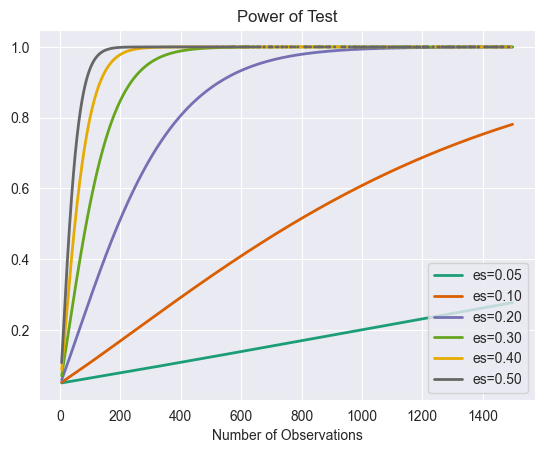

In [17]:
from statsmodels.stats.power import TTestIndPower, TTestPower
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid') # Nice background styling on plots

power_analysis = TTestIndPower()

power_analysis.plot_power(dep_var='nobs',
                          nobs = np.array(range(5,1500)),
                          effect_size=np.array([.05, .1, .2,.3,.4,.5]),
                          alpha=0.05)
plt.show()